# 绘制双Y轴坐标系

In [ ]:
在进行数据分析时，有时候我们需要在同一个坐标图中比较两种数据在时间序列上的关系时，由于两种数据的单位和数据并不统一，也是不同的类型的数据，
因此我们不能用一个Y轴来共同衡量两类不同的数据，这时候我们就需要绘制双Y轴图。

In [1]:
import pandas as pd
datas = pd.read_excel('../data/600001SH.xlsx')
print(datas.shape)
datas.head()

(105, 13)


,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元)
0,600004.SH,白云机场,2015-01-04,14.23,14.28,14.28,12.81,13.04,12091206,166226459,-1.19,-8.3626,13.7477
1,600004.SH,白云机场,2015-01-05,13.04,12.79,13.33,12.60,13.14,17396695,227096572,0.10,0.7669,13.0540
2,600004.SH,白云机场,2015-01-06,13.14,13.17,13.45,13.06,13.43,9676196,127728786,0.29,2.2070,13.2003
3,600004.SH,白云机场,2015-01-07,13.43,13.23,13.23,12.35,12.42,2315000,29774567,-1.01,-7.5205,12.8616
4,600004.SH,白云机场,2015-01-08,12.42,12.60,12.84,12.15,12.70,18756201,235967215,0.28,2.2544,12.5808


In [ ]:
我们的目的是研究二月份某公司的每日开盘价以及对应的成交量，所以方便分析，需要在一个双Y轴坐标图中同时绘制出收盘价和成交量的时间序列图

In [3]:
# 首先，需要将日期列设置成数据的索引，方便我们后续按照日期获取数据。
# 将日期设置为index
datas.index = pd.to_datetime(datas['日期'])
# 获取二月份的数据
feb_datas = datas['2015-02']

In [ ]:
# matlab中subplot（m，n，p）括号中的代表什么意思？

# subplot是将多个图画到一个平面上的工具。
# 其中，m和n代表在一个图像窗口中显示m行n列个图像，也就是整个figure中有n个图是排成一行的，一共m行，
# 后面的p代表现在选定第p个图像区域，即在第p个区域作图。如果m=2就是表示2行图。p表示图所在的位置，p=1表示从左到右从上到下的第一个位置。

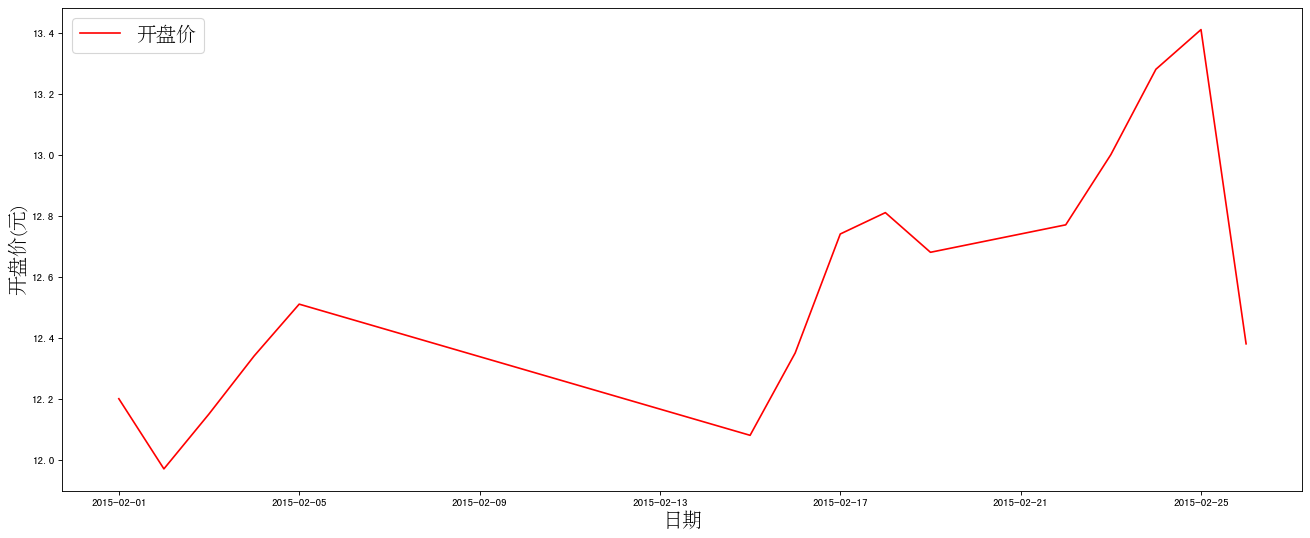

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='../data/STSONG.TTF',size=18)

# 获取数据
datas = pd.read_excel('../data/600001SH.xlsx')
datas.index = pd.to_datetime(datas['日期'])
feb_datas = datas['2015-02']

# 绘制图形
fig = plt.figure(figsize=(20,8),dpi=80)
ax = fig.add_subplot(111)   # 用`add_subplot`添加了Axes坐标轴实例
lin1 = ax.plot(feb_datas.index.tolist(),feb_datas['开盘价(元)'].values.tolist(),label='开盘价',color='red')
ax.legend(prop=my_font,loc=0)#图例及位置： 1右上角，2 左上角 loc函数可不写 0为最优 ncol为标签有几列
# 此处若是不写plt.legend，则不会显示标签
ax.set_ylabel("开盘价(元)",fontproperties=my_font)
ax.set_xlabel("日期",fontproperties=my_font)
plt.show()

## 双y轴绘制的关键函数：twinx()

万事俱备，接下来看看双y轴绘制的关键函数：`twinx()`。

`twinx()`函数表示共享x轴，共享表示的就是x轴使用同一刻度线。

接下来，我们先把每日收盘价的折线图绘制出来：

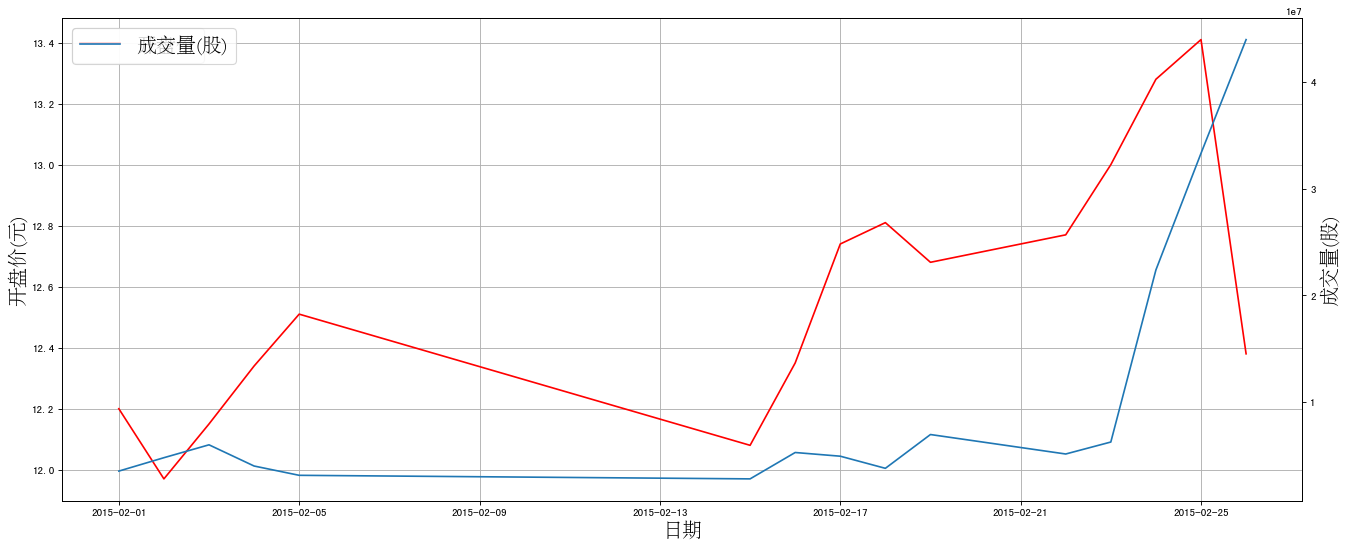

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='../data/STSONG.TTF',size=18)

# 获取数据
datas = pd.read_excel('../data/600001SH.xlsx')
datas.index = pd.to_datetime(datas['日期'])
feb_datas = datas['2015-02']

# 绘制图形
fig = plt.figure(figsize=(20,8),dpi=80)
ax = fig.add_subplot(111)  # 用`add_subplot`添加了Axes坐标轴实例
lin1 = ax.plot(feb_datas.index.tolist(),feb_datas['开盘价(元)'].values.tolist(),label='开盘价',color='red')
ax.set_ylabel("开盘价(元)",fontproperties=my_font)
ax.set_xlabel("日期",fontproperties=my_font)
ax.legend(prop=my_font)

# 使用Axes坐标轴实例  去调用`twinx()`函数，从而实现两个Y轴共享一个X轴的效果。
ax2 = ax.twinx() # `ax.twinx()`是在`ax`的坐标轴内创建一个共享X轴的的坐标轴实例。
# 所以我们可以在`ax2`的坐标轴实例中绘制每日成交量的折线图。
lin2 = ax2.plot(feb_datas.index.tolist(),feb_datas['成交量(股)'].values.tolist(),label='成交量(股)')
ax2.legend(prop=my_font)
#图例及位置： 1右上角，2 左上角 3 左下角4 右下角  loc函数可不写 0为最优 
# ncol为标签有几列
# 此处若是不写plt.legend，则不会显示标签
ax2.set_ylabel("成交量(股)",fontproperties=my_font)

# 绘制网格
ax.grid()
plt.show()

In [ ]:
因为是共享X轴，所以只用`ax.set_xlabel()`就可以设置X轴的标题。

由于Y轴不共享，所以每一个坐标系的Y轴标题都要使用`set_xlabel()`方法设置一次。

代码中，我们设置了两次图例的显示，所以出现了两个图例重叠的现象，所以我们需要合并图例。

合并图例的方法就是仅使用一个轴的legend()函数。

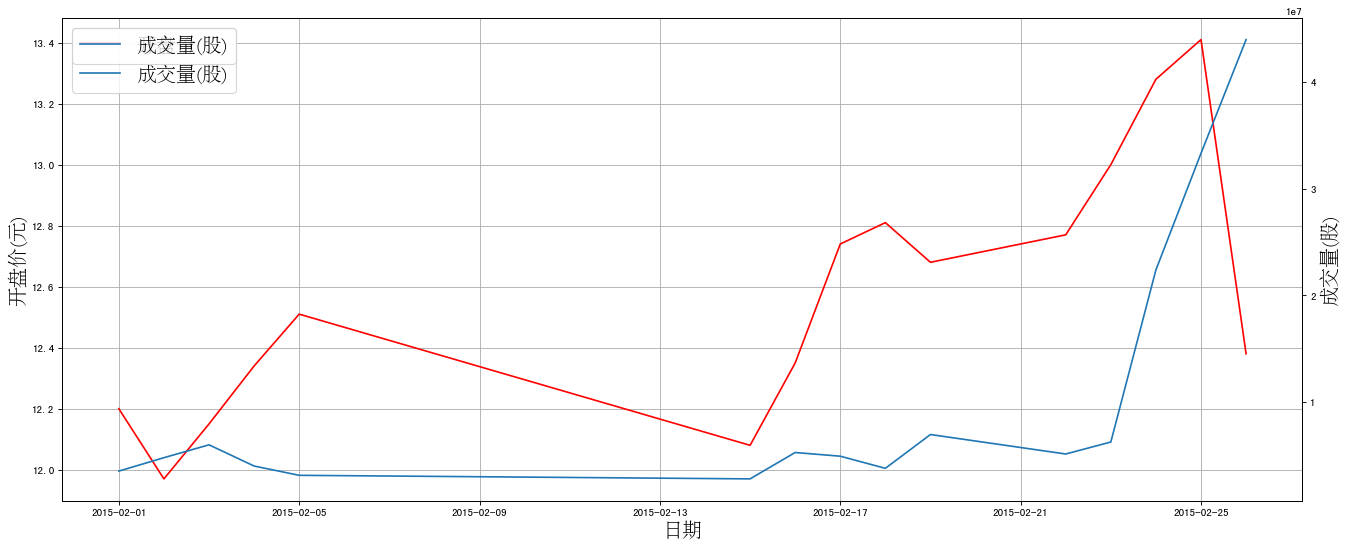

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='../data/STSONG.TTF',size=18)

# 获取数据
datas = pd.read_excel('../data/600001SH.xlsx')
datas.index = pd.to_datetime(datas['日期'])
feb_datas = datas['2015-02']

# 绘制图形
fig = plt.figure(figsize=(20,8),dpi=80)
ax = fig.add_subplot(111)
lin1 = ax.plot(feb_datas.index.tolist(),feb_datas['开盘价(元)'].values.tolist(),label='开盘价',color='red')
ax.legend(prop=my_font)

ax2 = ax.twinx()
lin2 = ax2.plot(feb_datas.index.tolist(),feb_datas['成交量(股)'].values.tolist(),label='成交量(股)')

ax2.legend(prop=my_font)
ax2.set_ylabel("成交量(股)",fontproperties=my_font)
ax.set_ylabel("开盘价(元)",fontproperties=my_font)
ax.set_xlabel("日期",fontproperties=my_font)

# 合并图例
lns = lin1+lin2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, prop=my_font)

# 绘制网格
ax.grid()
plt.show()

# 改变坐标轴的默认显示方式

Matplotlib在绘制图形的时候会默认显示上面和右侧的边框，以及坐标轴的颜色默认是黑色。

如果想要去掉默认的边框，通过`plt.gca()`获得当前的Axes对象。

```python
ax = plt.gca()
```

使用`spines`属性获取到对应的边框。

```python
ax.spines['right']
```

`right`右边框、`left`左边框、`top`上边框、`bottom`下边框。

通过`set_color('none')`方法可以设置边框的颜色。

```python
ax.spines['right'].set_color('none')
```

对于颜色的设置，`none`表示无色，也可以用`red`、`blue`等样式的英语单词或者是十六进制的颜色值`#0000FF`。

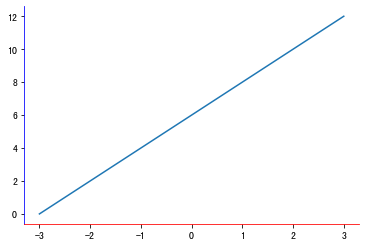

In [9]:
import matplotlib.pyplot as plt
y = range(0,14,2) 
x = [-3,-2,-1,0,1,2,3]

# 获得当前图表的图像
ax = plt.gca()

# 设置图型的包围线
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('red')
ax.spines['left'].set_color('#0000FF')

plt.plot(x,y)
plt.show()

我们已经成功的设置边框的颜色，但是还有一个问题就是坐标轴的交叉点也是默认设置的。

如果想要X轴的0点，和Y轴的0点交叉，需要使用`set_position`方法移动坐标轴的位置。

```python
ax.spines['bottom'].set_position(('data', 0))
```

设置底边的移动范围，移动到Y轴的0位置。

`data`:移动轴的位置到交叉轴的指定坐标


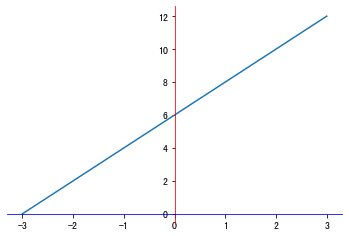

In [10]:
# 运行下面的代码，移动X轴和Y轴到（0，0）点

import matplotlib.pyplot as plt
import numpy as np
y = range(0,14,2) # x轴的位置
x = [-3,-2,-1,0,1,2,3]
# plt.figure(figsize=(20,8),dpi=80)

# 获得当前图表的图像
ax = plt.gca()

# 设置图型的包围线
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('blue')
ax.spines['left'].set_color('red')

ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 1))

plt.plot(x,y)
plt.show()